# Exercice 1

## LOAD DATA

In [5]:
def read_vocabulary_from_file(filename):
    with open(filename, "r", encoding="ISO-8859-1") as f:
        content = f.readlines()
        # Strip whitespace and remove unwanted lines
        content = [x.strip() for x in content if x.strip() and not x.startswith(';') and not x.endswith('+')]
    
    return content

In [6]:
positive_words = read_vocabulary_from_file("./opinion-lexicon-English/positive-words.txt")
negative_words = read_vocabulary_from_file("./opinion-lexicon-English/negative-words.txt")

In [10]:
print(len(positive_words))

2006


In [9]:
print(len(negative_words))

4783


## LOAD EMBEDDINGS

In [11]:
import numpy as np
import requests
import json

def read_vocabulary_from_file(filename):
    with open(filename, "r", encoding="ISO-8859-1") as f:
        content = f.readlines()
        # Strip whitespace and remove unwanted lines
        content = [x.strip() for x in content if x.strip() and not x.startswith(';') and not x.endswith('+')]
    
    return content

def load_glove_embeddings(path):
    embeddings = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            w = values[0]
            vectors = np.asarray(values[1:], dtype='float32')
            embeddings[w] = vectors
    return embeddings

word_dict = load_glove_embeddings('./glove.6B/glove.6B.50d.txt')
word = 'happy'
vector = word_dict.get(word)  # Get the vector if the word is in word_dict

## Prepare embeddings for positive and negative words

In [13]:
positive_vectors = []
negative_vectors = []

for i in positive_words:
    if i in word_dict:
        positive_vectors.append(word_dict.get(i))
        
for i in negative_words:
    if i in word_dict:
        negative_vectors.append(word_dict.get(i))


In [14]:
print(len(positive_vectors))

1893


In [15]:
print(len(negative_vectors))

4345


In [17]:
# Select 1500 ---------------------------------------------
positive_train = positive_vectors[:1500]
negative_train = negative_vectors[:1500]

# Select 500 ---------------------------------------------
positive_test = positive_vectors[1500:2000]
negative_test = negative_vectors[1500:2000]

# train
X_train = np.array(positive_train + negative_train)
Y_train = np.array([[1.0, 0.0]] * 1500 + [[0.0, 1.0]] * 1500)

# test
X_test = np.array(positive_test + negative_test)
Y_test = np.array([[1.0, 0.0]] * len(positive_test) + [[0.0, 1.0]] * len(negative_test))

# shuffle data --> to make it more random
train_indices = np.arange(X_train.shape[0])
np.random.shuffle(train_indices)
X_train = X_train[train_indices]
Y_train = Y_train[train_indices]

# same for test
test_indices = np.arange(X_test.shape[0])
np.random.shuffle(test_indices)
X_test = X_test[test_indices]
Y_test = Y_test[test_indices]

print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (3000, 50)
Y_train shape: (3000, 2)
X_test shape: (893, 50)
Y_test shape: (893, 2)


Epoch 1/5
94/94 [==============================] - 1s 3ms/step - loss: 0.4717 - accuracy: 0.7777 - val_loss: 0.3965 - val_accuracy: 0.8163
Epoch 2/5
94/94 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.8723 - val_loss: 0.3734 - val_accuracy: 0.8343
Epoch 3/5
94/94 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.8887 - val_loss: 0.3654 - val_accuracy: 0.8365
Epoch 4/5
94/94 [==============================] - 0s 2ms/step - loss: 0.2582 - accuracy: 0.8947 - val_loss: 0.4018 - val_accuracy: 0.8264
Epoch 5/5
28/28 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8354
Test loss: 0.3940412402153015
Test accuracy: 0.835386335849762


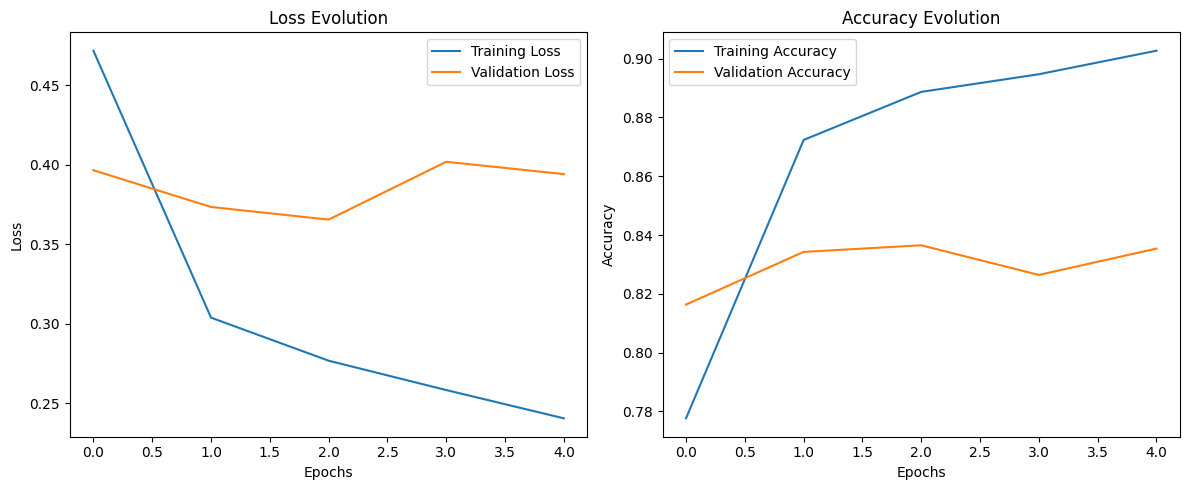

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(64, input_shape=(50,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))

loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.tight_layout()
plt.show()


In [20]:
print(f'Training Accuracy: {history.history["accuracy"][-1]}')
print(f'Validation Accuracy: {history.history["val_accuracy"][-1]}')

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Training Accuracy: 0.9026666879653931
Validation Accuracy: 0.835386335849762
28/28 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8354
Test Loss: 0.3940412402153015
Test Accuracy: 0.835386335849762


# Classify new words

In [25]:
new_words = ['joyful', 'miserable', 'sunshine', 'rainy', 'fantastic', 'terrible', 'average', 'confusing', 'neutral', 'ambiguous', "unpredictable", "Strange", "weird", "bizarre", "unusual", "odd", "Uncertain", "Different", "Odd"]

word_dict = load_glove_embeddings('glove.6B/glove.6B.50d.txt')

new_vectors = []
new_word_labels = []

for word in new_words:
    if word in word_dict:
        new_vectors.append(word_dict[word])
        new_word_labels.append(word)
        
new_vectors = np.array(new_vectors)
predictions = model.predict(new_vectors)

clearly_positive_words = []
clearly_negative_words = []
hesitant_words = []

for i, word in enumerate(new_word_labels):
    prob_positive = predictions[i][0]
    prob_negative = predictions[i][1]
    if prob_positive > 0.6:
        clearly_positive_words.append((word, prob_positive, prob_negative))
    elif prob_negative > 0.6:
        clearly_negative_words.append((word, prob_positive, prob_negative))
    elif 0.4 <= prob_positive <= 0.6:
        hesitant_words.append((word, prob_positive, prob_negative))

# ---------------------------------------------- PRINT THE RESULTS --> to see the classification and the proba
print("Clearly Positive Words:")
for word, prob_pos, prob_neg in clearly_positive_words:
    print(f"{word}: Positive Probability = {prob_pos} | Negative Probability = {prob_neg} |")

print("\nClearly Negative Words:")
for word, prob_pos, prob_neg in clearly_negative_words:
    print(f"{word}: Positive Probability = {prob_pos} | Negative Probability = {prob_neg} |")

print("\nHesitant Words:")
for word, prob_pos, prob_neg in hesitant_words:
    print(f"{word}: Positive Probability = {prob_pos} | Negative Probability = {prob_neg} |")


1/1 [==============================] - 0s 16ms/step
Clearly Positive Words:
joyful: Positive Probability = 0.9997101426124573 | Negative Probability = 0.00028980584465898573 |
sunshine: Positive Probability = 0.9926160573959351 | Negative Probability = 0.007383942604064941 |
fantastic: Positive Probability = 0.9998239874839783 | Negative Probability = 0.0001760181039571762 |
average: Positive Probability = 0.9269210696220398 | Negative Probability = 0.073078952729702 |
neutral: Positive Probability = 0.916949987411499 | Negative Probability = 0.08304998278617859 |
unusual: Positive Probability = 0.9708507657051086 | Negative Probability = 0.02914925292134285 |
odd: Positive Probability = 0.8480384349822998 | Negative Probability = 0.151961550116539 |

Clearly Negative Words:
miserable: Positive Probability = 0.06622812151908875 | Negative Probability = 0.9337719082832336 |
rainy: Positive Probability = 0.01860770769417286 | Negative Probability = 0.9813923239707947 |
terrible: Positive

# Analysis

For this analysis, I will proceed in steps: first commenting on the training results and then on the classification results of the new words, including the hesitant words.

## Training Results

The training results are quite good. Even with a few epochs, we achieved 90% accuracy on the training set and 83% accuracy on the test set. Here are the training results:

- **Final Test Results:**
  - **Test Loss**: 0.3940
  - **Test Accuracy**: 83.54%

The model achieved approximately 90% accuracy on the training set and around 83.54% on the test set, which aligns well with the expected performance. However, we can see slight overfitting in the graph. This could have a significant impact on the model's performance on unseen data later.

## Classification Results of New Words

**Clearly Positive Words:**

- **Joyful, Sunshine, Fantastic**: These words are strongly positive, and the model correctly identifies them with very high positive probabilities.
- **Average, Neutral, Unusual, Odd**: These words are generally more neutral but lean positive in certain contexts. The model's high positive probabilities indicate that it perceives these words as positive more often.

**Clearly Negative Words:**

- **Miserable, Rainy, Terrible**: These words have strong negative connotations, and the model accurately assigns high negative probabilities to them.
- **Confusing, Ambiguous, Unpredictable, Bizarre**: These words can often be context-dependent but generally carry a negative sentiment. The model's classification as negative aligns with their usual interpretation.

**Hesitant Words:**

- **Weird**: This word has probabilities of 43% positive and 57% negative. It is a good example of a word with ambiguous sentiment. Depending on the context, "weird" can be positive (interesting, unique) or negative (strange). We can accept the model's hesitation in classifying this word.

It's very difficult to find other hesitant words in the list. The model seems to be quite confident in its classification of most words. This could be due to the simplicity of the model and the limited training data. A more complex model or additional training data could help capture more nuanced sentiment in ambiguous cases.

### Discussion

The model's performance is quite good, achieving high accuracy on both training and test sets. The classification results for new words also show that the model can accurately identify sentiment.

- **Clearly Positive and Negative Words**: The model correctly identifies words that are clearly positive or negative, showing it has learned well from the training data.
- **Hesitant Words**: Words like "weird" fall into the hesitant category because their sentiment can be unclear and depends on the context. The model's hesitation here is a good sign, indicating it understands that these words can be both positive and negative.

Overall, the model performs well, balancing accuracy and handling ambiguous cases. To improve further, we could use more training data, try more advanced models, or add more features.
